In [1]:
import matplotlib.pyplot as plt
import numpy as np

import physipy
from physipy import s, m, setup_matplotlib

from physipy import Dimension, units, quantify, Quantity

ms = units["ms"]
mm = units['mm']
km = units["km"]
cm = units["cm"]

Besides matplotlib being the most-used, most-documented, and most masture plotting package in python, a good reason to use it is its ability to handle units automatically, through its units interface.

Ressources :
 - https://github.com/matplotlib/matplotlib/blob/97115aef5c18af5e48eb4ef041b6f48567088874/lib/matplotlib/axis.py#L1521
 
print(ax.xaxis.have_units())
print(ax.yaxis.have_units()) 
print(ax.xaxis.have_units())
print(ax.xaxis.converter)
print(ax.xaxis.units)
print(ax.xaxis.get_units())
print(ax.xaxis.set_units("totot"))

- See astropy for plotting context : https://docs.astropy.org/en/stable/_modules/astropy/visualization/units.html#quantity_support
- Astropy known issues : https://docs.astropy.org/en/stable/known_issues.html#quantity-issues

- artist
https://github.com/matplotlib/matplotlib/blob/87119ea07357bc065bf729bfb7cd35e16dffe91b/lib/matplotlib/artist.py#L188

# Plotting with matplotlib

By default, Quantity' are plotted with their raw value, ie si-unit value

/Users/mocquin/MYLIB10/MODULES/physipy/physipy/quantity/quantity.py:703: UserWarning: The unit of the quantity is stripped for __array_struct__
  warnings.warn(f"The unit of the quantity is stripped for {item}")
/Users/mocquin/MYLIB10/MODULES/physipy/physipy/quantity/quantity.py:703: UserWarning: The unit of the quantity is stripped for __array_struct__
  warnings.warn(f"The unit of the quantity is stripped for {item}")


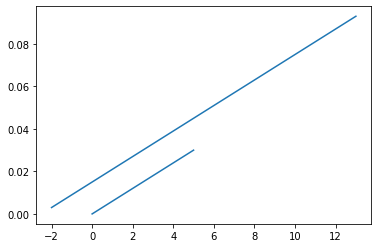

In [2]:
y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')
ax.plot(3*x-2*s, 3*y+3*mm)

# Plotting with matplotlib in a context

Using a context to only use the Quantity interface for plotting :

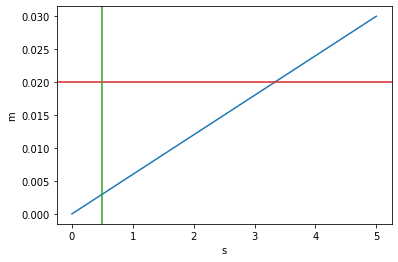

In [3]:
with physipy.quantity.plot.plotting_context():
    y = np.linspace(0, 30) * mm
    x = np.linspace(0, 5) * s
    
    fig, ax = plt.subplots()
    ax.plot(x, y, 'tab:blue')
    ax.axhline(0.02 * m, color='tab:red')
    ax.axvline(500*ms, color='tab:green')

Then outside the context the behaviour is the same as by default, ie without calling `setup_matplotlib()`:

/Users/mocquin/MYLIB10/MODULES/physipy/physipy/quantity/quantity.py:703: UserWarning: The unit of the quantity is stripped for __array_struct__
  warnings.warn(f"The unit of the quantity is stripped for {item}")


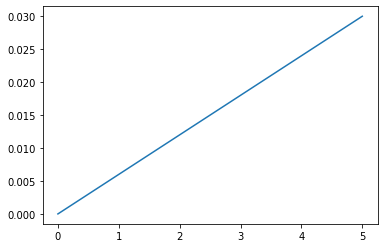

In [4]:
y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')

# Quick-Plotting shortcut

Quick plot an array-like quantity

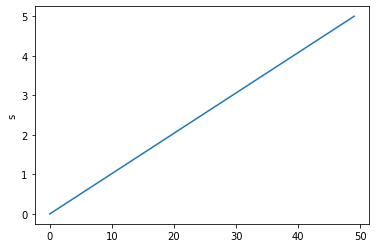

In [5]:
x.plot()

# Plotting with matplotlib

Examples taken from [pint](https://pint.readthedocs.io/en/stable/plotting.html).
Make sure you enable units handling in matplotlib with `setup_matplotlib`

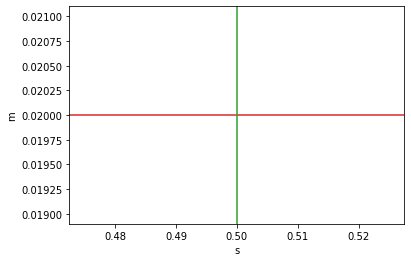

In [6]:
setup_matplotlib()

y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s

fig, ax = plt.subplots()
#ax.plot(x, y, 'tab:blue')
ax.axhline(0.02 * m, color='tab:red')
ax.axvline(500*ms, color='tab:green')

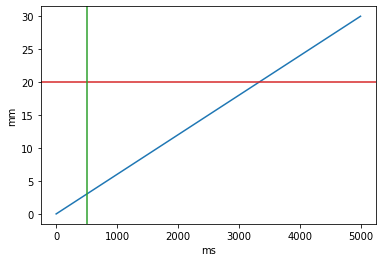

In [7]:
import matplotlib.pyplot as plt
import numpy as np

y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s

fig, ax = plt.subplots()
ax.yaxis.set_units(mm)
ax.xaxis.set_units(ms)

ax.plot(x, y, 'tab:blue')
ax.axhline(0.02 * m, color='tab:red')
ax.axvline(500*ms, color='tab:green')

The axis units can be changed after the values are plotted as wellimport matplotlib.pyplot as plt
import numpy as np

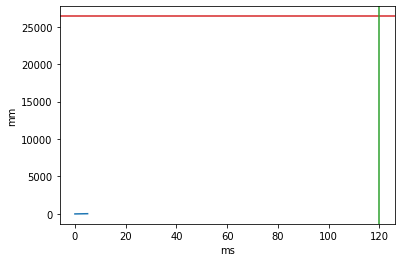

In [8]:
y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * ms

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')
ax.axhline(26400 * mm, color='tab:red')
ax.axvline(120 * ms, color='tab:green')
ax.yaxis.set_units(mm)
ax.xaxis.set_units(ms)
ax.autoscale_view()

## limits

1 s
1 m
(2.0, 3.0)
(0.025400000000000002, 0.1778)


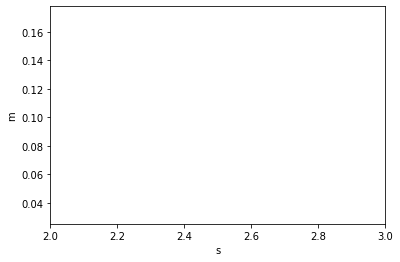

In [9]:
import matplotlib.pyplot as plt
from physipy import units, s, imperial_units, setup_matplotlib, m
inch = imperial_units["in"]
setup_matplotlib()
 

fig, ax = plt.subplots()
ax.set_xlim(2*s,3*s)
ax.set_ylim(1*inch, 7*inch)
print(ax.xaxis.units)
print(ax.yaxis.units)
print(ax.get_xlim())
print(ax.get_ylim())

## Axis methods

True
True
True
1 s
1 s
None
0.001 s


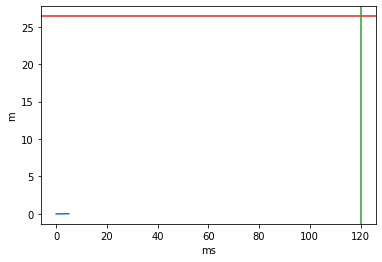

In [10]:
setup_matplotlib()
y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * ms

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')
ax.axhline(26400 * mm, color='tab:red')
ax.axvline(120 * ms, color='tab:green')
#ax.yaxis.set_units(mm)
#ax.xaxis.set_units(ms)
ax.autoscale_view()

print(ax.xaxis.have_units())
print(ax.yaxis.have_units()) 
print(ax.xaxis.have_units())
print(ax.xaxis.converter)
print(ax.xaxis.units)
print(ax.xaxis.get_units())
print(ax.xaxis.set_units(ms))
print(ax.xaxis.get_units())

# Plotting with favunit

If the Quantity objects that are called in `ax.plot` have favunit, it will be used by default as the axis's unit.

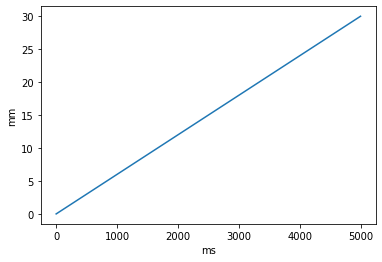

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from physipy import s, m, units, setup_matplotlib
setup_matplotlib() # make matplotlib physipy's units aware
mm = units["mm"]   # get millimiter
ms = units["ms"]   # get millisecond

y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s
y.favunit = mm # no need to call ax.yaxis.set_units(mm)
x.favunit = ms # no need to call ax.xaxis.set_units(ms)

fig, ax = plt.subplots()
ax.plot(x, y,)

## twin axes

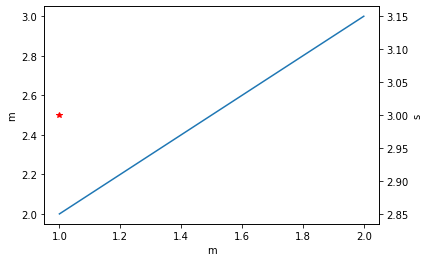

In [14]:
import matplotlib.pyplot as plt
import numpy as np

import physipy
from physipy import s, m, setup_matplotlib
from physipy.quantity.utils import asqarray

from physipy import Dimension, units, quantify, Quantity
setup_matplotlib()

import matplotlib.units as munits
print(munits.registry.get_converter([1*m]))

fig, ax = plt.subplots()
ax.plot(asqarray([m, 2*m]),
        asqarray([2*m, 3*m]))#, "-o")
ax2 = ax.twinx()
ax2.plot(m, 3*s, "*", color="r")

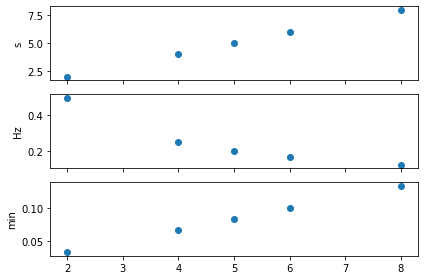

In [17]:

import numpy as np
import matplotlib.pyplot as plt
#from basic_units import secs, hertz, minutes
from physipy import units, setup_matplotlib
setup_matplotlib()
secs = units["s"]
hertz = units["Hz"]
minutes = units["min"]

# create masked array
data = (1, 2, 3, 4, 5, 6, 7, 8)
mask = (1, 0, 1, 0, 0, 0, 1, 0)
xsecs = secs * np.ma.MaskedArray(data, mask, float)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True)

ax1.scatter(xsecs, xsecs)
ax2.scatter(xsecs, 1/xsecs, yunits=hertz)
ax3.scatter(xsecs, xsecs, yunits=minutes)

fig.tight_layout()
plt.show()

## units

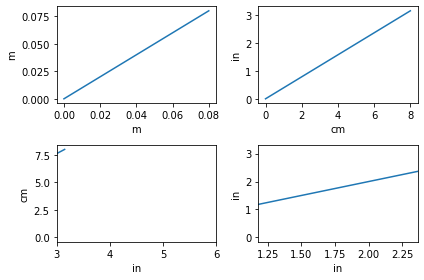

In [18]:
import matplotlib.pyplot as plt
import numpy as np

cms = cm * np.arange(0, 10, 2)

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(cms, cms)

axs[0, 1].plot(cms, cms, xunits=cm, yunits=inch)

axs[1, 0].plot(cms, cms, xunits=inch, yunits=cm)
axs[1, 0].set_xlim(3, 6)  # scalars are interpreted in current units

axs[1, 1].plot(cms, cms, xunits=inch, yunits=inch)
axs[1, 1].set_xlim(3*cm, 6*cm)  # cm are converted to inches
plt.tight_layout()
plt.show()

## Bar plots

Based on https://matplotlib.org/stable/gallery/units/bar_unit_demo.html

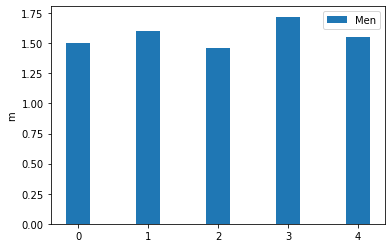

In [19]:
import numpy as np
#from basic_units import cm, inch
from physipy import units, imperial_units, setup_matplotlib
from physipy.quantity.utils import asqarray
import matplotlib.pyplot as plt

cm = units["cm"]
inch = imperial_units["in"]


N = 5
men_means = asqarray([150*cm, 160*cm, 146*cm, 172*cm, 155*cm])
men_std = asqarray([20*cm, 30*cm, 32*cm, 10*cm, 20*cm])

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars
ax.bar(ind, 
       men_means, 
       width,
       bottom=0*cm, 
       #yerr=men_std, 
       label='Men')

#women_means = (145*cm, 149*cm, 172*cm, 165*cm, 200*cm)
#women_std = (30*cm, 25*cm, 20*cm, 31*cm, 22*cm)
#ax.bar(ind + width, women_means, width, bottom=0*cm, yerr=women_std,
#       label='Women')

#ax.set_title('Scores by group and gender')
#ax.set_xticks(ind + width / 2, labels=['G1', 'G2', 'G3', 'G4', 'G5'])

ax.legend()
#ax.yaxis.set_units(inch)
#ax.autoscale_view()

plt.show()

# Known issues

## [X]FIXED (axvline and friends)

Without units implemented, the `axvline` and friend use a comparison to the axis values which are by default floats. Hence the comparaison with a quantity that have a dimension fails. It works with a dimensionless Quantity because of quantify turns the axis values to Quanities, and the comparison works

In [10]:
# restart kernel
import matplotlib.pyplot as plt
import numpy as np

import physipy
from physipy import s, m, setup_matplotlib
from physipy import Dimension, units, quantify, Quantity


ms = units["ms"]
mm = units['mm']
km = units["km"]
cm = units["cm"]

Without setup : 

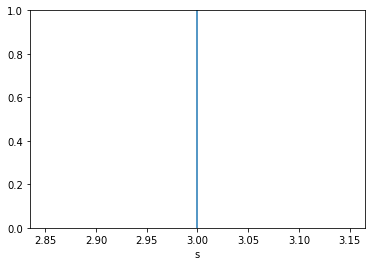

In [11]:
try:
    plt.axvline(3*s)
except Exception as e:
    print(e)

Without setup but plotting a dimensionless Quantity

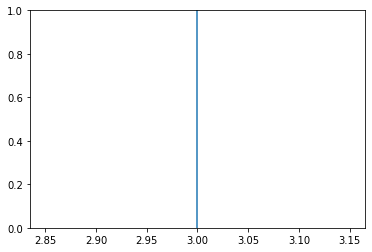

In [12]:
plt.axvline(Quantity(3, Dimension(None)))

Works when calling setup_matplotlib() : 

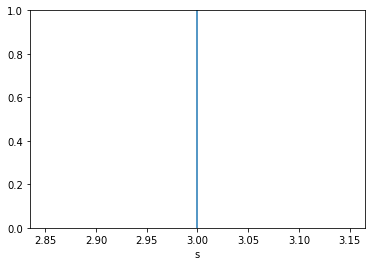

In [13]:
setup_matplotlib()
try:
    plt.axvline(3*s)
except Exception as e:
    print(e)